In [5]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_oscuro
conf_matplotlib_oscuro()

In [255]:
from datetime import datetime, timedelta

In [80]:
from poliastro.maneuver import Maneuver

In [153]:
from astropy.coordinates import EarthLocation

In [189]:
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation

In [367]:
ΔV = 0.035078249 * u.m/u.s
thruster_secs = 26.88 * u.s
duty_cycle = 0.112 * u.one
thruster_eff = 1 * u.one
duration = thruster_secs / duty_cycle
δv = ΔV/int(duration.value)
thruster_vec = [1,0,0]*δv
EWSK0398 = [Maneuver((duty_cycle*u.s, thruster_vec)) for i in range(int(duration.value))]

In [368]:
r = [21688591.8, -36154596.3, -22139.6363]*u.m
v = [2636.61379, 1582.13661, -5.16579754]*u.m/u.s
epoch = Time(2000, format='jyear') + TimeDelta(638594520*u.s)
s0 = Orbit.from_vectors(Earth, r=r, v=v, epoch=Time(epoch, format="jyear"))
s0.epoch

<Time object: scale='tt' format='jyear' value=2020.2358392273177>

In [369]:
mnvr_epoch = datetime(2020, 3, 27, 16, 37, 5)
ff_time = (mnvr_epoch - epoch.datetime).seconds
downtime = 1 - duty_cycle.value

In [370]:
s0 = s0.propagate(ff_time*u.s)

In [371]:
s0.epoch.datetime

datetime.datetime(2020, 3, 27, 16, 37, 5)

In [372]:
sf = s0.apply_maneuver(EWSK0398[0])
sf = sf.propagate(downtime*u.s)

for pulse in EWSK0398[1:]:
    sf = sf.apply_maneuver(pulse)
    sf = sf.propagate(downtime*u.s)

In [373]:
coords = []
for i in range(100):
    sf = sf.propagate(3600*u.s)
    coords.append([sf.represent_as(SphericalRepresentation), sf.epoch.datetime])

In [374]:
from numpy import pi, degrees, array, radians
2*pi/24

0.2617993877991494

In [395]:
radians(114.8)

2.0036379812894904

In [397]:
radians(.2)

0.003490658503988659

In [376]:
degrees(0.8)

45.836623610465864

In [377]:
2*pi*((17 + 1)/24 + (41 + 39)/60/24 + (41 + 12)/60/60/24)

5.065309099548377

In [378]:
efem_prop[0][2].hour

17

In [387]:
efem_prop = [[coord.lon, coord.lat, time] for coord, time in coords]
xs, ys = [], []
for lon, lat, tiempo in efem_prop:
    xs.append((lon.value - 2*pi*((tiempo.hour)/24 +
               (tiempo.minute)/60/24 +
               (tiempo.second)/60/60/24))%(2*pi) - 2*pi)
    ys.append(lat.value)

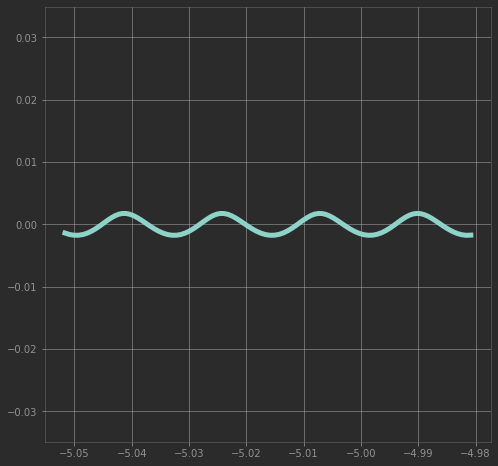

In [391]:
fig = figure(figsize=(8,8))
ax = fig.gca()
ax.plot(xs, ys)
ax.set_ylim(-0.0349, 0.0349);

In [366]:
sf.epoch.datetime

datetime.datetime(2020, 3, 31, 20, 41, 5)

In [362]:
sr = s0.represent_as(SphericalRepresentation)
sr

<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (5.58129507, -0.00103917, 42159.38559104)
 (has differentials w.r.t.: 's')>

In [363]:
δ_utc = 24*114.8/360
δ_utc_h = int(δ_utc)
δ_utc_m = int((δ_utc - δ_utc_h)*60)
δ_utc_s = (δ_utc - δ_utc_h - δ_utc_m/60)*60*60
δ_utc, δ_utc_h, δ_utc_m, δ_utc_s

(7.653333333333332, 7, 39, 11.99999999999668)

In [301]:
sr.lat

<Latitude -0.00103917 rad>

In [302]:
sf.represent_as(SphericalRepresentation)

<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (5.59880017, -0.00106388, 42159.31510965)
 (has differentials w.r.t.: 's')>

In [303]:
op = OrbitPlotter3D(dark=True)

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Initial orbit")

In [ ]:
s0 = Orbit.from_vectors

In [ ]:
s0 = Orbit.from_vector

In [ ]:
s0 = Orbit.from_coords

In [6]:
from poliastro.twobody.thrust import change_inc_ecc
from poliastro.twobody import Orbit
from poliastro.bodies import Earth
from poliastro.twobody.propagation import cowell

In [56]:
from poliastro.plotting import OrbitPlotter2D, OrbitPlotter3D, StaticOrbitPlotter

In [132]:
from astropy import units as u
from astropy.time import Time ,TimeDelta

In [171]:
a = 42166.067 * u.km

ecc_0 = 190.16550e-6 * u.one
inc_0 = 0.028903854 * u.deg
raan_0 = 226.36206 * u.deg
argp_0 = 159.78475 * u.deg
tanom_0 = 262.28040 * u.deg

ecc_f = 189.75690e-6* u.one
inc_f = 0.028902510 * u.deg
raan_f = 226.35704 * u.deg
argp_f = 151.45460 * u.deg
tanom_f = 270.59398 * u.deg

ΔV = 0.04259823
secs = 131.76
accel = ΔV/secs
epoch_0 = Time(datetime.strptime("2020/04/09 13:37:16.833", "%Y/%m/%d %H:%M:%S.%f"), format="datetime")

s1 = Orbit.from_classical(Earth, a, ecc_0, inc_0, raan_0, argp_0, tanom_0, epoch=epoch_0)
a_d, _, _, t_f = change_inc_ecc(s0, ecc_f, inc_f, accel)
sf = s0.propagate(t_f * u.s, method=cowell, ad=a_d, rtol=1e-8)

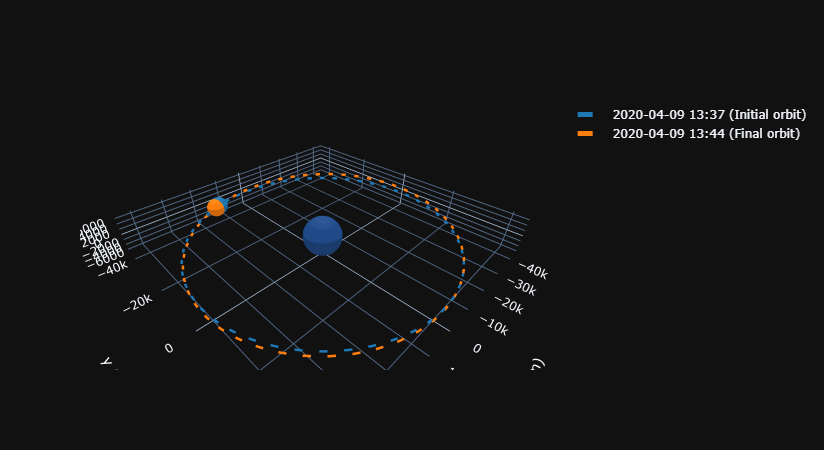

In [65]:
op = OrbitPlotter3D(dark=True)

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Final orbit")

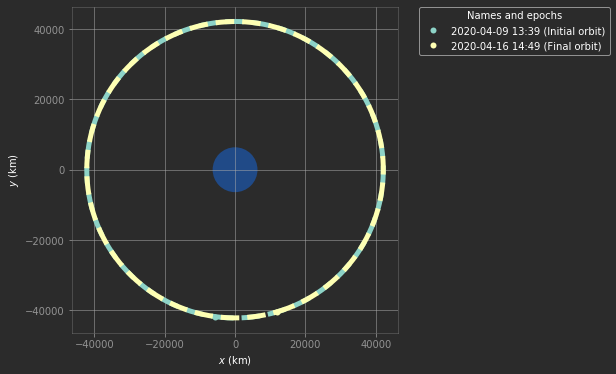

In [59]:
op = StaticOrbitPlotter()

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Final orbit");